# MACD - Moving average convergence/divergence

##How it works?

MACD is based on EMA (Exponential moving average). MACD is composed of 2 plots: MACD and MACD Signal.

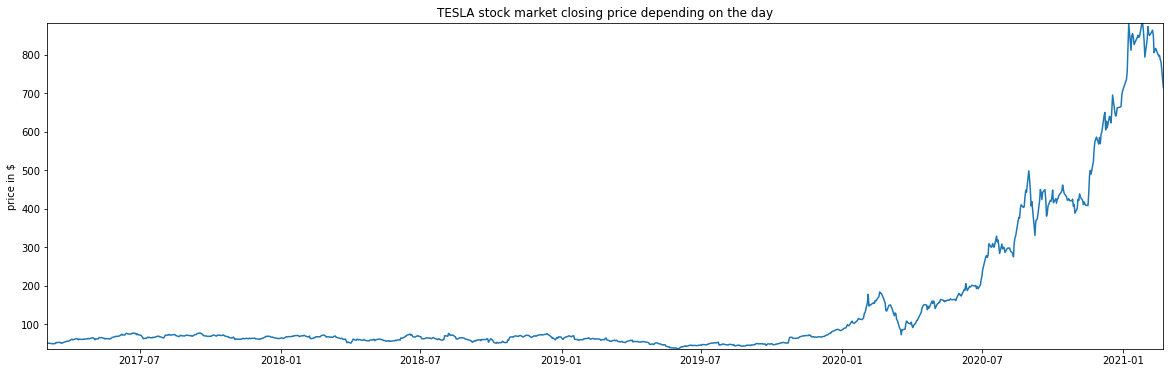

In [107]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stock_data = pd.read_csv('tesla-stock.csv')
stock_data.columns = ['date', 'close', 'volume', 'open', 'high', 'low']
columns_to_mod = ['close', 'open', 'high', 'low']

for column in columns_to_mod:
    stock_data[column] = stock_data[column].astype(str)
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)

stock_data['date'] = pd.to_datetime(stock_data['date'])

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots(figsize=(20,6))
plot(stock_data['date'], stock_data['close'], ax, 'TESLA stock market closing price depending on the day', 'price in $')

##EMA Formula:

![](https://i.imgur.com/yhqFwNo.png)

In [108]:
def EMA(period, day, array=None):
    alfa = 2/(period+1)
    numerator = 0
    denominator = 0
    for i in range(period):
        if array is None:
            numerator += pow(1-alfa, i)*stock_data.loc[day + i, 'close']
        else:
            numerator += pow(1-alfa, i)*array[day + i]
        denominator += pow(1-alfa, i)
    return numerator/denominator


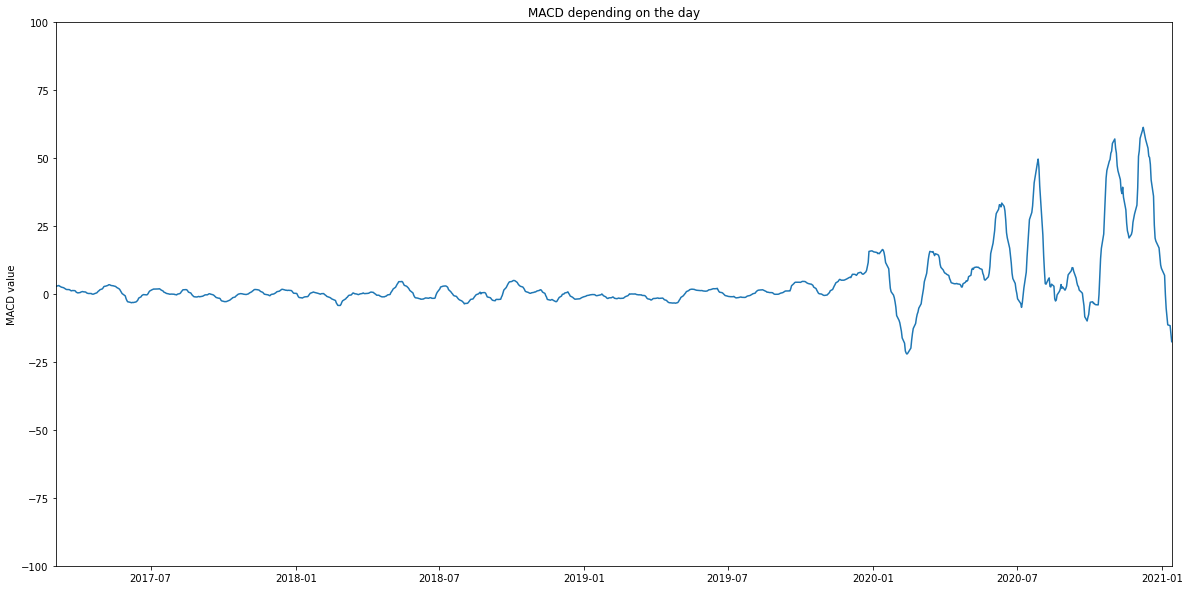

In [109]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_ylim([-100,100])
MACD = []
fixed_dates = stock_data['date'][26:]
for i in range(1, 975):
        MACD.append(EMA(12, i) - EMA(26, i))
plot(fixed_dates, MACD, ax2, 'MACD depending on the day', 'MACD value')

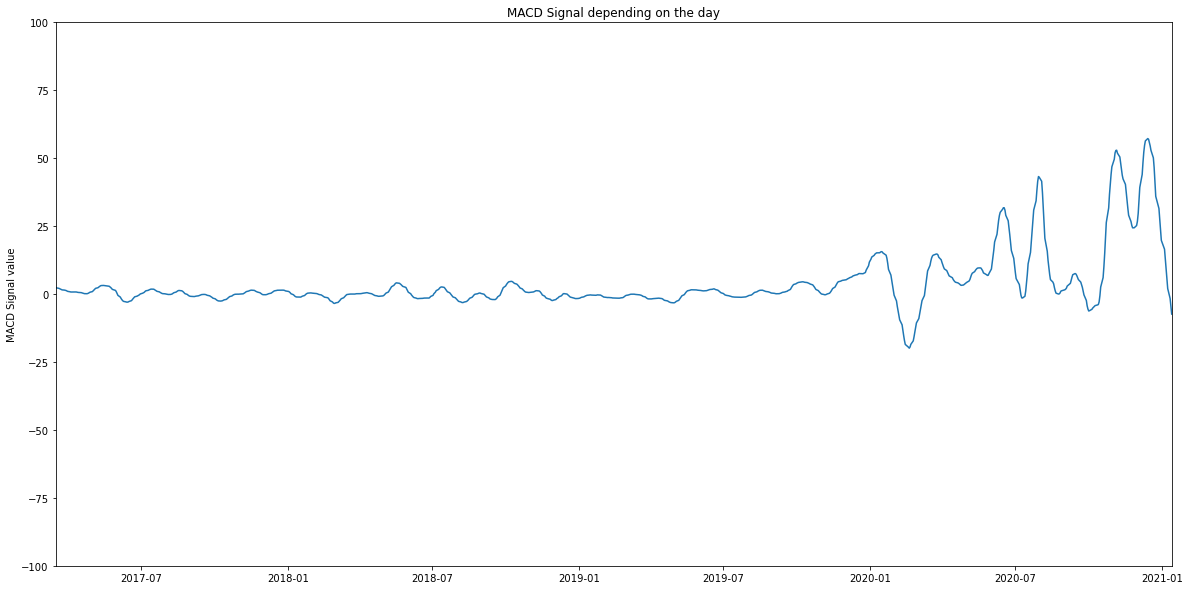

In [110]:
fig, ax3 = plt.subplots(figsize=(20,10))
ax3.set_ylim([-100,100])
fixed_dates = fixed_dates[:965]
MACD_signal = []
for i in range(1, 966):
    MACD_signal.append(EMA(9, i, MACD))
plot(fixed_dates, MACD_signal, ax3, 'MACD Signal depending on the day', 'MACD Signal value')

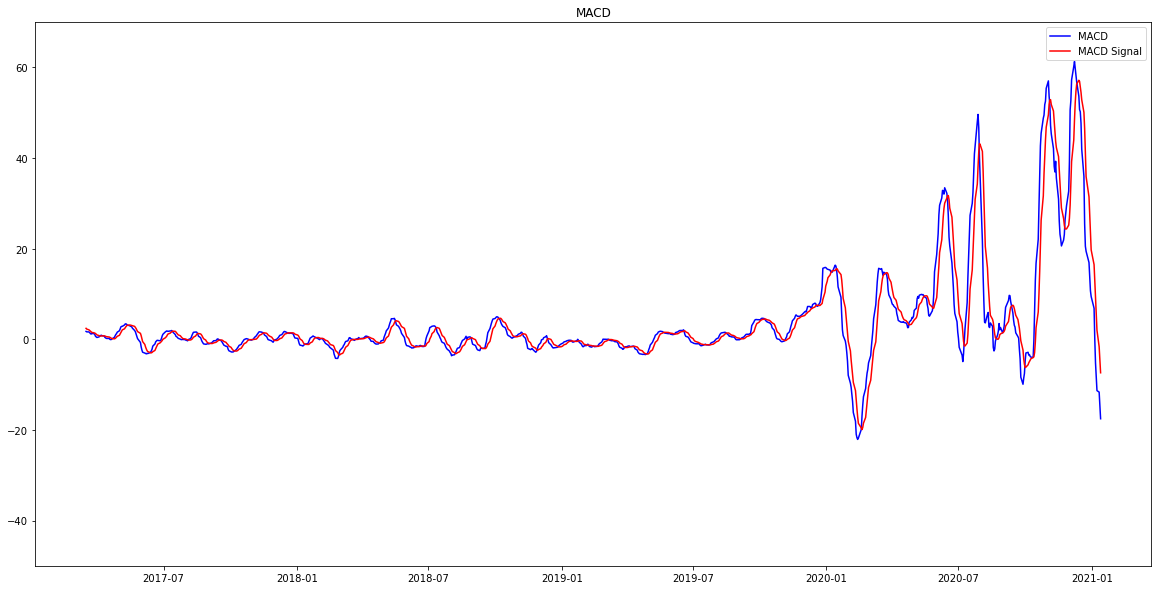

In [111]:
MACD = MACD[:965]
plt.figure(figsize=(20, 10))
plt.title('MACD')
plt.ylim([-50, 70])
macd_plt, = plt.plot(fixed_dates, MACD, 'b')
macd_signal_plt, = plt.plot(fixed_dates, MACD_signal, 'r')
plt.legend([macd_plt, macd_signal_plt], ['MACD', 'MACD Signal'])
plt.show()

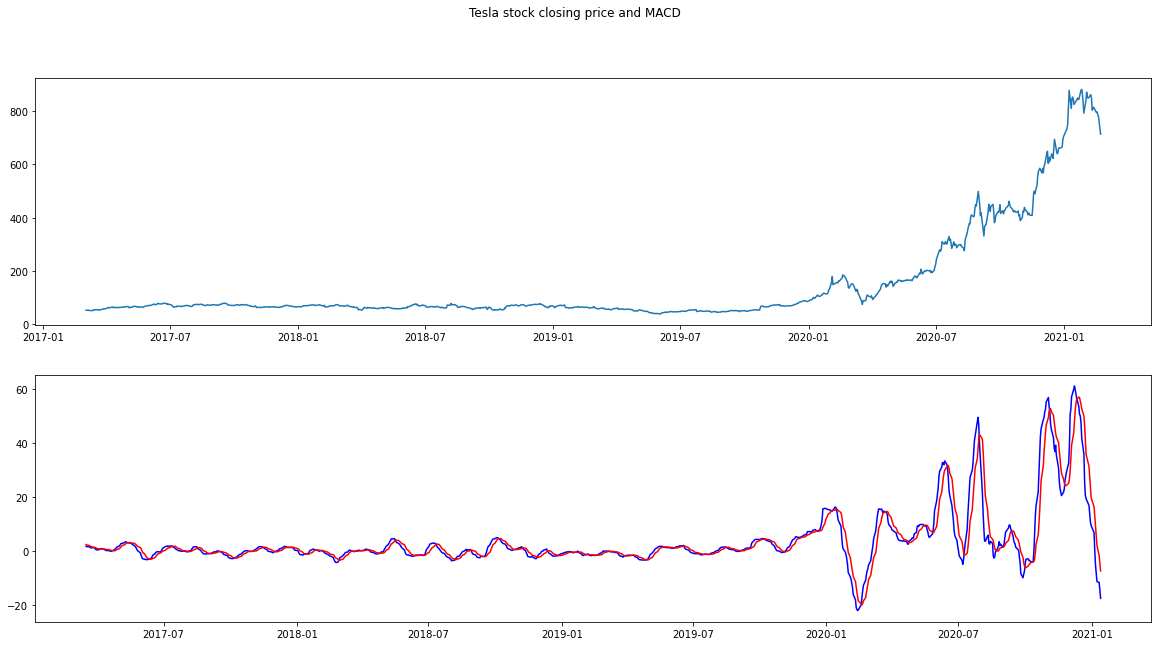

In [112]:
fig, axs = plt.subplots(2, figsize=(20,10))
fig.suptitle('Tesla stock closing price and MACD')
axs[0].plot(stock_data['date'], stock_data['close'])
axs[1].plot(fixed_dates, MACD, 'b', fixed_dates, MACD_signal, 'r')

In [116]:
money = 1000
stocks = 0

def buy(price):
    global money 
    global stocks
    money = money - price
    stocks = stocks + 1
    
def sell(price):
    global money 
    global stocks
    money = money + price
    stocks = stocks - 1
    
sell_dates = []
buy_dates = []
    
for day in range(7, 965):
    past_week_MACD = MACD[day-7:day]
    past_week_SIGNAL = MACD_signal[day-7:day]
    
    MACD_average = np.average(past_week_MACD)
    Signal_average = np.average(past_week_SIGNAL)
    
    if MACD[day] - MACD_average < MACD[day]*0.9 and MACD[day] > MACD_signal[day]:
        if stocks > 0:
            sell(stock_data['close'][day])
            sell_dates.append(stock_data['date'][day])
    elif MACD[day] - MACD_average < MACD[day]*0.1 and MACD[day] < MACD_signal[day]:
        if money >= stock_data['close'][day]*3:
            buy(stock_data['close'][day])
            buy(stock_data['close'][day])
            buy(stock_data['close'][day])
            buy_dates.append(stock_data['date'][day])

last_value = stock_data['close'][len(stock_data['close']) - 1]
            
for stock in range(stocks):
    sell(last_value)
            
print(money)

1986.9710000000007


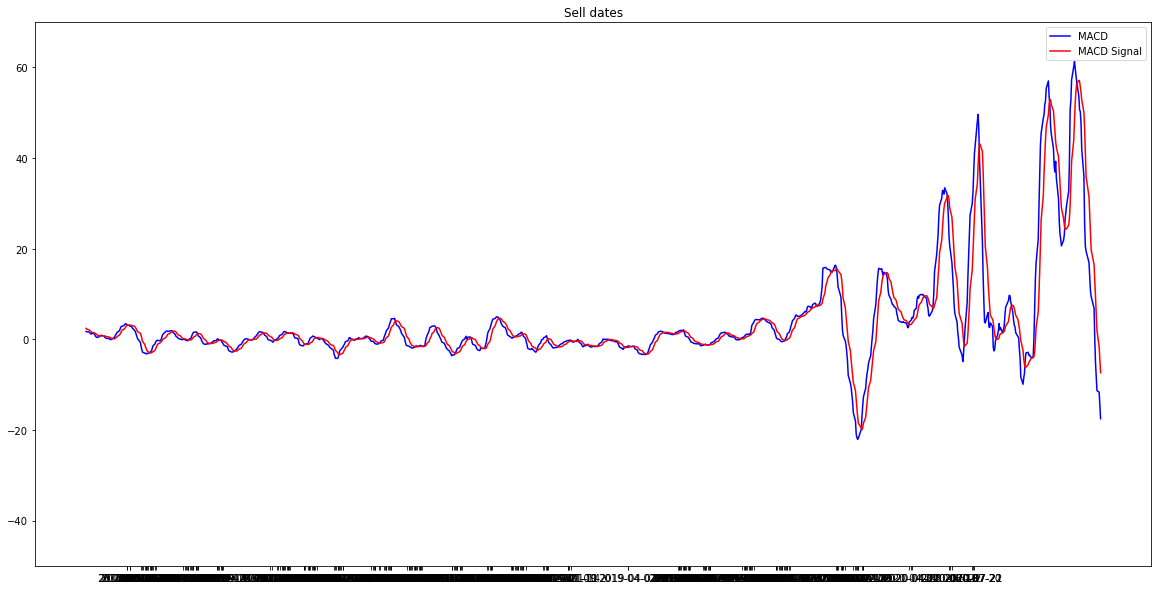

In [117]:
MACDMACD = MACD[:965]
plt.figure(figsize=(20, 10))
plt.title('Sell dates')
plt.ylim([-50, 70])
macd_plt, = plt.plot(fixed_dates, MACD, 'b')
macd_signal_plt, = plt.plot(fixed_dates, MACD_signal, 'r')
plt.legend([macd_plt, macd_signal_plt], ['MACD', 'MACD Signal'])

plt.xticks(sell_dates)
plt.show()

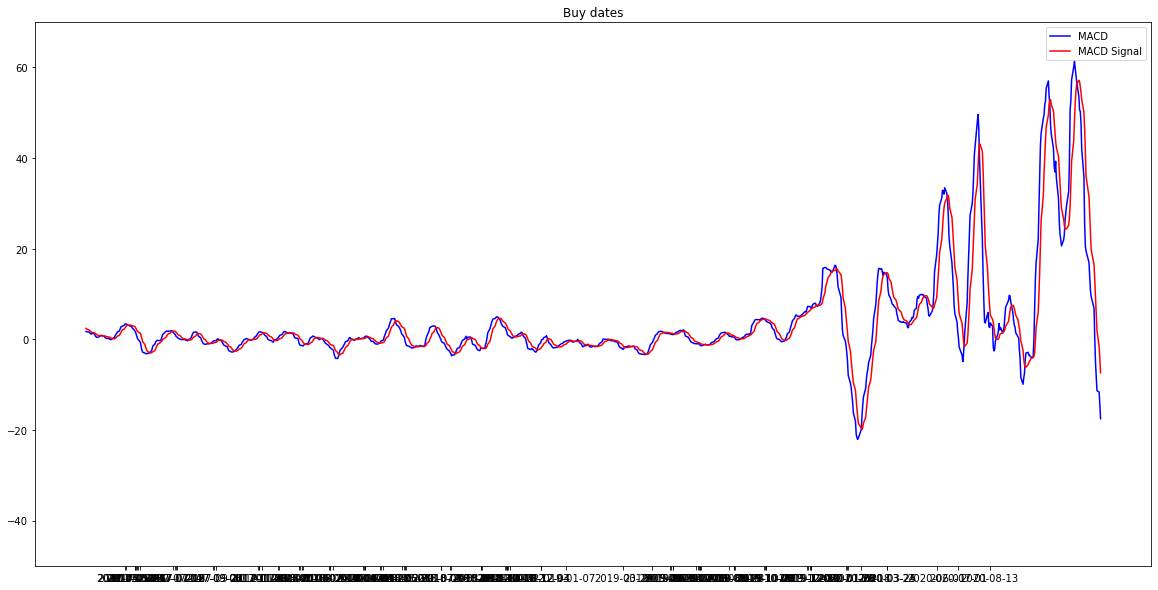

In [118]:
MACD = MACD[:965]
plt.figure(figsize=(20, 10))
plt.title('Buy dates')
plt.ylim([-50, 70])
macd_plt, = plt.plot(fixed_dates, MACD, 'b')
macd_signal_plt, = plt.plot(fixed_dates, MACD_signal, 'r')
plt.legend([macd_plt, macd_signal_plt], ['MACD', 'MACD Signal'])

plt.xticks(buy_dates)
plt.show()